# 岭回归

## 模型正则化(Regularization)   

模型正则化的任务是限制参数的大小    
模型的参数往往表示曲线的陡峭或者平滑程度    
如果模型发生了正则化，往往参数的绝对值就会非常大，所以使用正则化的方式来限制参数的大小来减小过拟合的程度   

这里介绍第一种模型正则化的方式，又称为岭回归    

目标:   

使$$\sum^{m}_{i=1}{(y^{(i)} - \theta_0 - \theta_1X^{(i)}_1 - \theta_2X^{(i)}_2 - ... - \theta_nX^{(i)}_n)^2}$$尽可能小  

可以看成是使：  

$$J(\theta) = MSE(y, y^{hat}; \theta)$$  
尽可能小   

加入模型正则化后变成：   

$$J(\theta) = MSE(y, y^{hat}, \theta) + \alpha\frac{1}{2}\sum^{n}_{i=1}{\theta_i^{2}}$$尽可能小   

这时最优化的目标都需要考虑对后一项最小化，只能通过限制各参数项$\theta_i$的大小，这里的$\alpha$是正则项的系数，表示了当前损失函数对于正则项的偏重程度，这里$\theta_i$是从1开始，这是因为$\theta_0$代表截距，它并不影响模型曲线的陡峭程度  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [9]:
# 初始化数据
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = x * 0.5 + 3 + np.random.normal(0, 1, size=100)

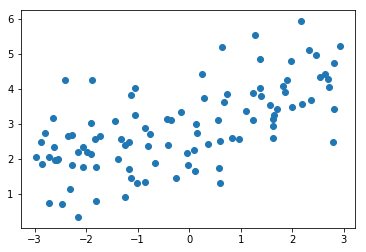

In [10]:
plt.scatter(x, y)
plt.show()

In [11]:
# 首先是使用多项式回归 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [12]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.metrics import mean_squared_error

poly10_reg = PolynomialRegression(degree=20)
poly10_reg.fit(X_train, y_train)
y_poly_predict = poly10_reg.predict(X_test)  
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

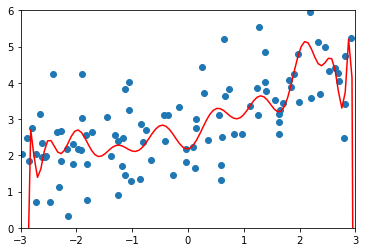

In [14]:
# 绘制拟合结果
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly10_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

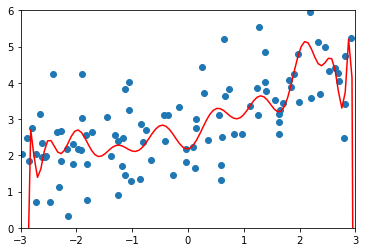

In [16]:
# 为了方便下面的测试，这里将绘制拟合结果的函数进行封装
# 传入要绘制结果的模型
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)    
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly10_reg)

### 使用岭回归 

In [17]:
from sklearn.linear_model import Ridge 

# 定义岭回归管道方法
# 两个参数，alpha参数为正则项的系数
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [18]:
ridge1_reg = RidgeRegression(degree=20, alpha=0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754155471

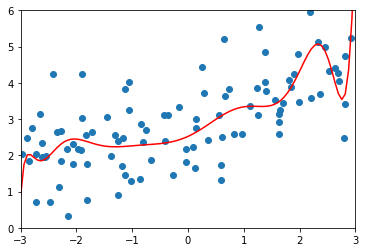

In [19]:
# 绘制拟合结果
plot_model(ridge1_reg)
# 可以看到现在的拟合效果已经比刚才的过拟合平滑了许多
# 其实这里的模拟数据应该呈一个倾斜的直线形状

当alpha取10时

In [24]:
ridge2_reg = RidgeRegression(degree=20, alpha=10)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1451272194878865

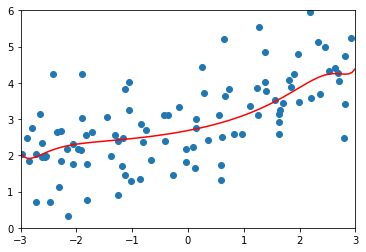

In [25]:
plot_model(ridge2_reg)

当alpha取非常大时，模型优化的重心就变成了使得正则化项最小   
这时得到的应该是一条直线

In [22]:
ridge3_reg = RidgeRegression(degree=20, alpha=1000000)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8404103153255003

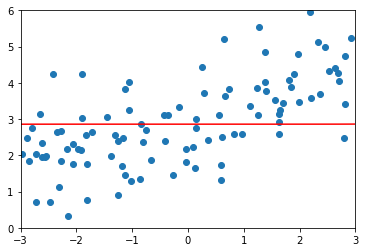

In [23]:
plot_model(ridge3_reg)